In [16]:
import matplotlib.pyplot as plt
import numpy as np
import math
from math import log

In [17]:
filePath = "publications.txt"
file = open(filePath,'r')

In [18]:
distinctAuthors=[]
distinctVenues=[]
distinctPublications=[]
indexes=[] #indexes are unique and !=""
minYear = 3000
maxYear = -1
venuePublications = {} #{venue, #publications}

In [19]:
for line in file:    
            
    # capture publication name        
    if line.startswith("#*"):
        publication = line[2:].strip()
        if publication != "":
            distinctPublications.append(publication)
            
    # capture list of authors        
    if line.startswith("#@"):
        authors = line[2:].strip().split(",")
        for author in authors:
            author = author.strip()
            if author != "":
                distinctAuthors.append(author)
    
    # capture venues
    if line.startswith("#c"):
        venue = line[2:].strip()
        if venue != "":
            distinctVenues.append(venue)
            
    # capture index
    if line.startswith("#index"):
        index = line[6:].strip()
        indexes.append(index)
        # compute no. of publications for each venue 
        if venue != "":
            venuePublications[venue] = 1 if venuePublications.get(venue) is None else venuePublications.get(venue)+1
        
    if line.startswith("#t"):
        year = line[2:].strip()
        if year != "":
            if int(year) < minYear:
                minYear = int(year)
            if int(year) > maxYear:
                maxYear = int(year)   
   
file.close()

In [20]:
# converts to linear array (used for computing statistics)
def getWeightedArray(xvalues, weights):
     zippedArray = zip(xvalues, weights)
     weightedArray = []
     for item in zippedArray:
         for frequency in range(item[1]):
             weightedArray.append(item[0])
     return weightedArray

In [21]:
print("For publications.txt :")
print("No. of distinct authors: ", len(set(distinctAuthors)))
print("No. of distinct Venues: ", len(set(distinctVenues)))
print("No. of distinct Publications: ", len(indexes))
print("No. of distinct Publication names: ", len(set(distinctPublications)))
print("Minium year : ", minYear)
print("Maximum year : ", maxYear)

For publications.txt :
No. of distinct authors:  1232494
No. of distinct Venues:  8707
No. of distinct Publications:  2146341
No. of distinct Publication names:  2106900
Minium year :  -1
Maximum year :  2013


For AP_Train.txt :<br>
No. of distinct authors:  1478733 <br>
No. of distinct Venues:  255685 <br>
No. of distinct Publications:  1976815 <br>
No. of distinct Publication names:  1929486 <br>

<b>The Aminer dataset given in previous assignmnet was upto 2012, but publications.txt contain some articles published after 2012. Example: </b>
#*Detecting Apposition for Text Simplification in Basque.
#@Itziar Gonzalez-Dios,María Jesús Aranzabe,Arantza Díaz de Ilarraza Sánchez,Ander Soraluze
#t2013
#cCICLing (2)
#index3677655

<b>Some publications have inappropriate value for years in publications.txt.</b><br>
<b>Example-1:</b>
#*Proceedings of the Tenth ACM International Workshop on Data Engineering for Wireless and Mobile Access, MobiDE 2011, Athens, Greece, June 12, 2011
#@George Kollios,Yufei Tao
#t1012
#cMobiDE
#index3494901
#% 
#!<br>

<b>Example-2:</b>
#*Cloud Computing, Second International Conference, CloudCom 2010, November 30 - December 3, 2010, Indianapolis, Indiana, USA, Proceedings
#@
#t-1
#cCloudCom
#index2957943
#% 
#!<br>
This is not the case with AP_train.txt.

<b>The number of distinct venues in "publication.txt" is very less when compared to the number of distinct authors and publications. Lets perform some analysis on "publications per venue"</b>

In [22]:
publicationsPerVenue = {}
maxPubVenue = ""
maxCount = 0

# create a list of publications per venue to plot histogram
for venue in venuePublications.keys():
    count = venuePublications.get(venue)
    if count > maxCount:
        maxCount = count;
        maxPubVenue = venue
        
    if publicationsPerVenue.get(count) is None:
        publicationsPerVenue[count] = 1
    else:
        publicationsPerVenue[count] = publicationsPerVenue.get(count)+1

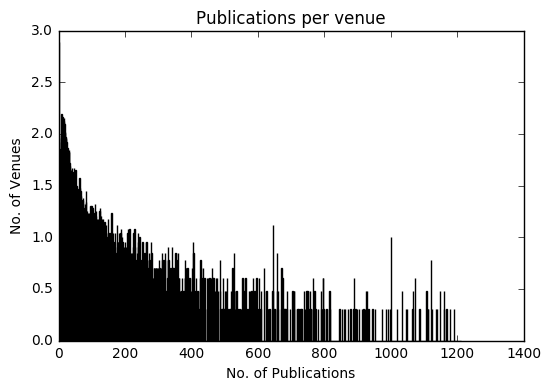

In [23]:
yvalues = np.array(list(publicationsPerVenue.values()))
xvalues = np.array(list(publicationsPerVenue.keys()))

logValues=[log(value,10)for value in yvalues]
xaxis=np.arange(len(xvalues))
plt.bar(xaxis,logValues,1,color="b")
plt.ylabel('No. of Venues')
plt.xlabel('No. of Publications')
plt.title('Publications per venue') 
plt.show()

In [24]:
# calculate the required statistics
weightedArray = getWeightedArray(xvalues, yvalues)

mean = np.mean(weightedArray)
std = np.std(weightedArray)
quartile1 = np.percentile(weightedArray, 25)
quartile2 = np.percentile(weightedArray, 50)
quartile3 = np.percentile(weightedArray, 75)

print("For publications.txt : ")
print("The mean of publications per venue :", mean)
print("The standard deviation of publications per venue :", std)
print("The variance of publications per venue :", std*std)
print("First Quartile (Q1) / 25th Percentile : ", quartile1)
print("Second Quartile (Q2) / 50th Percentile / Median : ", quartile2)
print("Third Quartile (Q3) / 75th Percentile : ", quartile3)

For publications.txt : 
The mean of publications per venue : 246.507522683
The standard deviation of publications per venue : 840.647726736
The variance of publications per venue : 706688.600466
First Quartile (Q1) / 25th Percentile :  15.0
Second Quartile (Q2) / 50th Percentile / Median :  47.0
Third Quartile (Q3) / 75th Percentile :  193.0


For AP_Train.txt : <br>
The mean of publications per venue : 7.73096583687<br>
The standard deviation of publications per venue : 83.3809075408<br>
The variance of publications per venue : 6952.37574233<br>
First Quartile (Q1) / 25th Percentile :  1.0<br>
Second Quartile (Q2) / 50th Percentile / Median :  1.0<br>
Third Quartile (Q3) / 75th Percentile :  1.0<br>

* The 3rd Quantile for AP_Train, Q3 = 1.0. i.e 75% of the data points lie between 0.0 and 1.0. This says that the disrtibution is very highly saturated towards the left. Whereas, for "publications.txt", Q3 = 193.0. Also, Q1 = 15 and median = 47. This says that this data is skewed on the right and is uniformly distributed, as compared to AP_Train.


* The standard deviation for AP_Train is 8.87. Whereas, the same for "publication.txt" is 840.64. This tells that large number of data points in AP_Train are present near the mean. While, the publication data is very highly scattered.